In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('owid-covid-data.csv')

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238474,ZWE,Africa,Zimbabwe,2022-11-24,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
238475,ZWE,Africa,Zimbabwe,2022-11-25,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
238476,ZWE,Africa,Zimbabwe,2022-11-26,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
238477,ZWE,Africa,Zimbabwe,2022-11-27,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(238479, 67)

In [5]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.250060e+05,2.246930e+05,2.234940e+05,2.056660e+05,205584.000000,204400.000000,223980.000000,223667.000000,222473.000000,204653.000000,...,143482.000000,94569.000000,170992.000000,219100.000000,187431.000000,2.374530e+05,7.992000e+03,7992.000000,8043.000000,7992.000000
mean,4.704158e+06,1.218250e+04,1.222009e+04,7.586876e+04,134.020901,134.683684,64189.498587,186.240325,186.678406,708.526798,...,32.813613,50.901540,3.088398,73.613128,0.724714,1.411195e+08,4.924899e+04,10.005140,14.243364,1385.481332
std,2.926805e+07,8.408984e+04,8.214153e+04,3.889782e+05,716.455071,702.141666,112183.589301,1156.885530,688.800774,991.494633,...,13.536176,31.875727,2.551656,7.446050,0.149603,6.932145e+08,1.356468e+05,13.417596,26.132743,1760.448636
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281517
25%,4.855000e+03,0.000000e+00,5.571000e+00,1.160000e+02,0.000000,0.000000,1157.713250,0.000000,1.200000,31.161000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.960070e+05,4.645000e+01,0.660000,0.000000,33.653485
50%,5.398100e+04,4.800000e+01,8.871400e+01,1.242000e+03,1.000000,1.429000,11243.971000,6.555000,18.124000,223.416000,...,33.100000,49.839000,2.500000,75.050000,0.742000,6.948395e+06,6.272600e+03,7.580000,7.400000,838.494043
75%,5.573805e+05,9.170000e+02,1.088678e+03,1.021875e+04,13.000000,15.000000,76596.063000,92.738000,131.451000,1051.219000,...,41.300000,83.241000,4.200000,79.070000,0.838000,3.369661e+07,3.598455e+04,15.580000,19.505000,2183.342461
max,6.415603e+08,4.081970e+06,3.436038e+06,6.631686e+06,17733.000000,14859.143000,685527.010000,228872.025000,36421.827000,6384.394000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.240683e+06,76.550000,376.580000,10032.844512


In [7]:
df.describe(include="all")

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,238479,225039,238479,238479,2.250060e+05,2.246930e+05,2.234940e+05,2.056660e+05,205584.000000,204400.000000,...,143482.000000,94569.000000,170992.000000,219100.000000,187431.000000,2.374530e+05,7.992000e+03,7992.000000,8043.000000,7992.000000
unique,248,6,248,1064,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MEX,Europe,Mexico,2021-09-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1063,54685,1063,247,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.704158e+06,1.218250e+04,1.222009e+04,7.586876e+04,134.020901,134.683684,...,32.813613,50.901540,3.088398,73.613128,0.724714,1.411195e+08,4.924899e+04,10.005140,14.243364,1385.481332
std,NaN,NaN,NaN,NaN,2.926805e+07,8.408984e+04,8.214153e+04,3.889782e+05,716.455071,702.141666,...,13.536176,31.875727,2.551656,7.446050,0.149603,6.932145e+08,1.356468e+05,13.417596,26.132743,1760.448636
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281517
25%,NaN,NaN,NaN,NaN,4.855000e+03,0.000000e+00,5.571000e+00,1.160000e+02,0.000000,0.000000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.960070e+05,4.645000e+01,0.660000,0.000000,33.653485
50%,NaN,NaN,NaN,NaN,5.398100e+04,4.800000e+01,8.871400e+01,1.242000e+03,1.000000,1.429000,...,33.100000,49.839000,2.500000,75.050000,0.742000,6.948395e+06,6.272600e+03,7.580000,7.400000,838.494043
75%,NaN,NaN,NaN,NaN,5.573805e+05,9.170000e+02,1.088678e+03,1.021875e+04,13.000000,15.000000,...,41.300000,83.241000,4.200000,79.070000,0.838000,3.369661e+07,3.598455e+04,15.580000,19.505000,2183.342461


In [8]:
df.drop(['new_cases_smoothed'], axis=1, inplace=True)

In [9]:
df.drop(['new_deaths_smoothed','new_cases_per_million','total_cases_per_million'],axis=1,inplace=True)

In [10]:
df.rename(columns={'date' : 'Date', 'location' : 'Country', 'continent' : 'Continent', 'iso_code' : 'ISO_code'}, inplace=True)

In [11]:
df

,ISO_code,Continent,Country,Date,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238474,ZWE,Africa,Zimbabwe,2022-11-24,257893.0,0.0,5606.0,0.0,0.0,343.494,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
238475,ZWE,Africa,Zimbabwe,2022-11-25,257893.0,0.0,5606.0,0.0,0.0,343.494,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
238476,ZWE,Africa,Zimbabwe,2022-11-26,257893.0,0.0,5606.0,0.0,0.0,343.494,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
238477,ZWE,Africa,Zimbabwe,2022-11-27,257893.0,0.0,5606.0,0.0,0.0,343.494,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [12]:
continent_unique = list(df.Continent.unique())
continent_unique

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [13]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [14]:
df3 = df2.groupby(['Date','Country','total_cases','total_deaths','total_vaccinations']).sum().reset_index()

In [15]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations,ISO_code,Continent,new_cases,new_deaths,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-01-01,Argentina,missing_value,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,27.7,missing_value,5.0,76.67,0.845,45510324.0,missing_value,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,missing_value,missing_value,missing_value,MEX,North America,missing_value,missing_value,missing_value,...,21.4,87.847,1.38,75.05,0.779,127504120.0,missing_value,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,missing_value,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,27.7,missing_value,5.0,76.67,0.845,45510324.0,missing_value,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,missing_value,missing_value,missing_value,MEX,North America,missing_value,missing_value,missing_value,...,21.4,87.847,1.38,75.05,0.779,127504120.0,missing_value,missing_value,missing_value,missing_value
4,2020-01-03,Argentina,missing_value,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,27.7,missing_value,5.0,76.67,0.845,45510324.0,missing_value,missing_value,missing_value,missing_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238474,2022-11-29,Denmark,missing_value,missing_value,missing_value,DNK,Europe,missing_value,missing_value,missing_value,...,18.8,missing_value,2.5,80.9,0.94,5882259.0,missing_value,missing_value,missing_value,missing_value
238475,2022-11-29,Germany,missing_value,missing_value,missing_value,DEU,Europe,missing_value,missing_value,missing_value,...,33.1,missing_value,8.0,81.33,0.947,83369840.0,missing_value,missing_value,missing_value,missing_value
238476,2022-11-29,Malaysia,missing_value,missing_value,missing_value,MYS,Asia,missing_value,missing_value,missing_value,...,42.4,missing_value,1.9,76.16,0.81,33938216.0,missing_value,missing_value,missing_value,missing_value
238477,2022-11-29,Netherlands,missing_value,missing_value,missing_value,NLD,Europe,missing_value,missing_value,missing_value,...,27.3,missing_value,3.32,82.28,0.944,17564020.0,missing_value,missing_value,missing_value,missing_value


In [16]:
df3['total_cases'].replace({'missing_value' : 0}, inplace=True)

In [17]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations,ISO_code,Continent,new_cases,new_deaths,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-01-01,Argentina,0.0,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,27.7,missing_value,5.0,76.67,0.845,45510324.0,missing_value,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,0.0,missing_value,missing_value,MEX,North America,missing_value,missing_value,missing_value,...,21.4,87.847,1.38,75.05,0.779,127504120.0,missing_value,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,0.0,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,27.7,missing_value,5.0,76.67,0.845,45510324.0,missing_value,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,0.0,missing_value,missing_value,MEX,North America,missing_value,missing_value,missing_value,...,21.4,87.847,1.38,75.05,0.779,127504120.0,missing_value,missing_value,missing_value,missing_value
4,2020-01-03,Argentina,0.0,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,27.7,missing_value,5.0,76.67,0.845,45510324.0,missing_value,missing_value,missing_value,missing_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238474,2022-11-29,Denmark,0.0,missing_value,missing_value,DNK,Europe,missing_value,missing_value,missing_value,...,18.8,missing_value,2.5,80.9,0.94,5882259.0,missing_value,missing_value,missing_value,missing_value
238475,2022-11-29,Germany,0.0,missing_value,missing_value,DEU,Europe,missing_value,missing_value,missing_value,...,33.1,missing_value,8.0,81.33,0.947,83369840.0,missing_value,missing_value,missing_value,missing_value
238476,2022-11-29,Malaysia,0.0,missing_value,missing_value,MYS,Asia,missing_value,missing_value,missing_value,...,42.4,missing_value,1.9,76.16,0.81,33938216.0,missing_value,missing_value,missing_value,missing_value
238477,2022-11-29,Netherlands,0.0,missing_value,missing_value,NLD,Europe,missing_value,missing_value,missing_value,...,27.3,missing_value,3.32,82.28,0.944,17564020.0,missing_value,missing_value,missing_value,missing_value


In [18]:
df3['total_deaths'].replace({'missing_value' : 0}, inplace=True)

In [19]:
df3['total_vaccinations'].replace({'missing_value' : 0}, inplace=True)

In [20]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations,ISO_code,Continent,new_cases,new_deaths,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-01-01,Argentina,0.0,0.0,0.0,ARG,South America,missing_value,missing_value,missing_value,...,27.7,missing_value,5.0,76.67,0.845,45510324.0,missing_value,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,0.0,0.0,0.0,MEX,North America,missing_value,missing_value,missing_value,...,21.4,87.847,1.38,75.05,0.779,127504120.0,missing_value,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,0.0,0.0,0.0,ARG,South America,missing_value,missing_value,missing_value,...,27.7,missing_value,5.0,76.67,0.845,45510324.0,missing_value,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,0.0,0.0,0.0,MEX,North America,missing_value,missing_value,missing_value,...,21.4,87.847,1.38,75.05,0.779,127504120.0,missing_value,missing_value,missing_value,missing_value
4,2020-01-03,Argentina,0.0,0.0,0.0,ARG,South America,missing_value,missing_value,missing_value,...,27.7,missing_value,5.0,76.67,0.845,45510324.0,missing_value,missing_value,missing_value,missing_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238474,2022-11-29,Denmark,0.0,0.0,0.0,DNK,Europe,missing_value,missing_value,missing_value,...,18.8,missing_value,2.5,80.9,0.94,5882259.0,missing_value,missing_value,missing_value,missing_value
238475,2022-11-29,Germany,0.0,0.0,0.0,DEU,Europe,missing_value,missing_value,missing_value,...,33.1,missing_value,8.0,81.33,0.947,83369840.0,missing_value,missing_value,missing_value,missing_value
238476,2022-11-29,Malaysia,0.0,0.0,0.0,MYS,Asia,missing_value,missing_value,missing_value,...,42.4,missing_value,1.9,76.16,0.81,33938216.0,missing_value,missing_value,missing_value,missing_value
238477,2022-11-29,Netherlands,0.0,0.0,0.0,NLD,Europe,missing_value,missing_value,missing_value,...,27.3,missing_value,3.32,82.28,0.944,17564020.0,missing_value,missing_value,missing_value,missing_value


In [21]:
df4 = df3[df3['total_deaths']>1000000]

In [22]:
countries = df4['Country'].unique()

In [23]:
len(countries)

10

In [24]:
country_deaths_greaterthan1mil = list(df4.Country.unique())
country_deaths_greaterthan1mil

['World',
 'High income',
 'Upper middle income',
 'Europe',
 'South America',
 'Asia',
 'Lower middle income',
 'North America',
 'European Union',
 'United States']

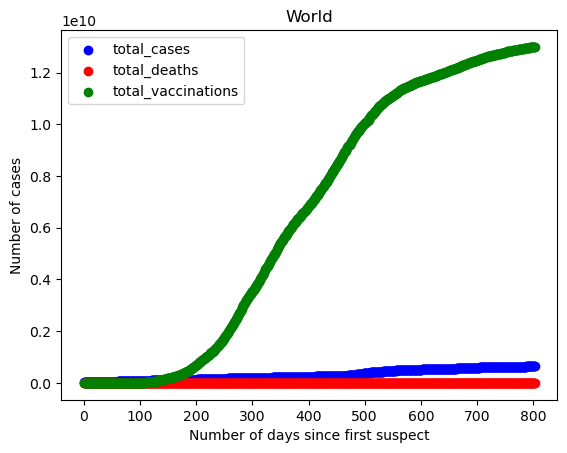

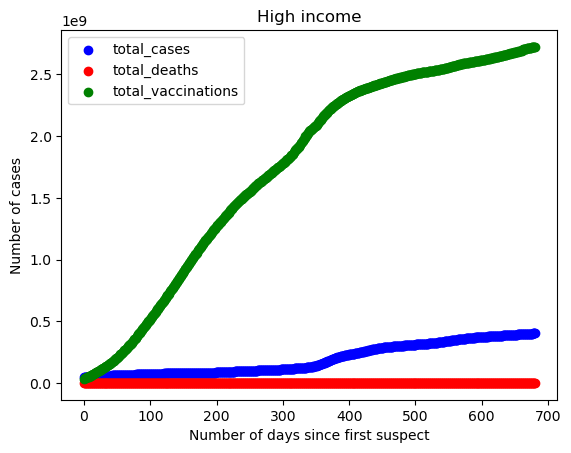

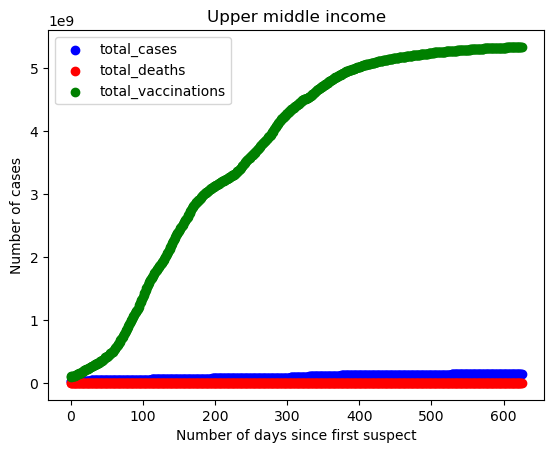

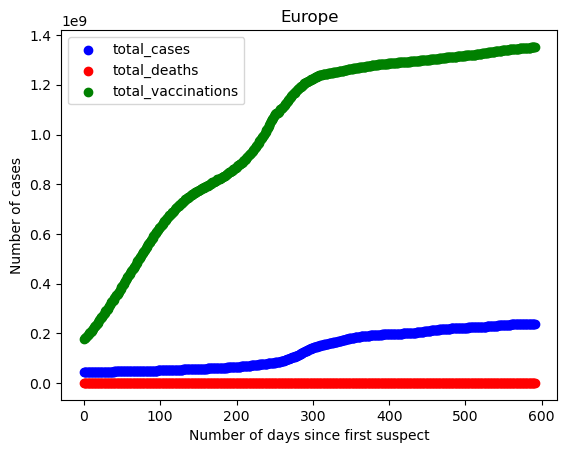

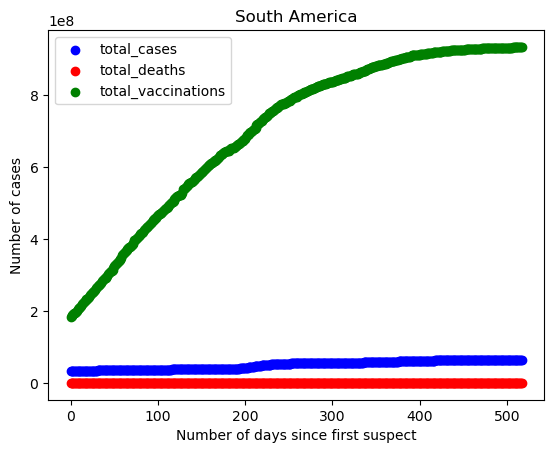

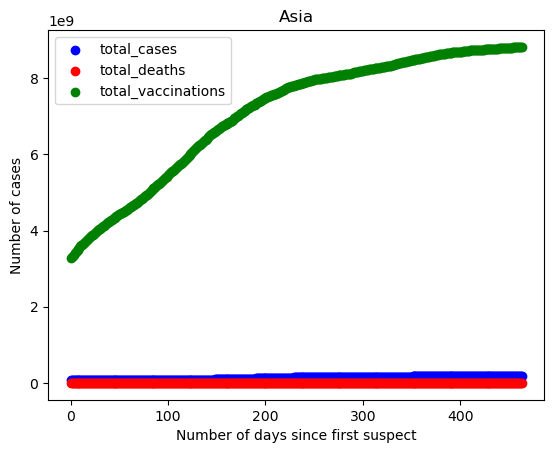

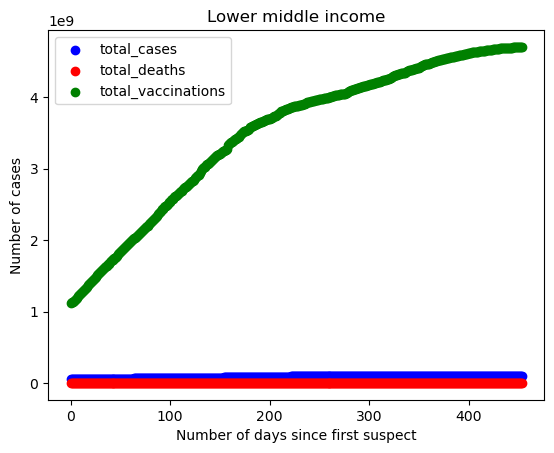

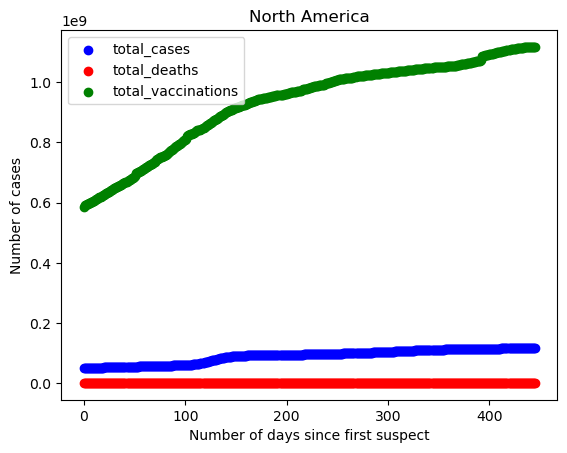

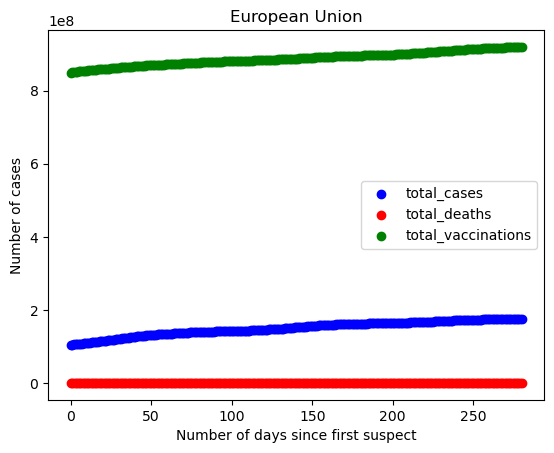

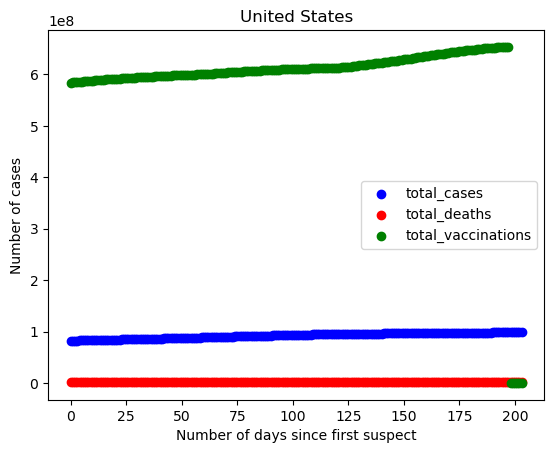

In [27]:
for idx in range(0, len(countries)):
    C = df4[df4['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)), C['total_cases'], color="blue", label="total_cases")
    plt.scatter(np.arange(0,len(C)), C['total_deaths'], color="red", label="total_deaths")
    plt.scatter(np.arange(0,len(C)), C['total_vaccinations'], color="green", label="total_vaccinations")
    plt.title(countries[idx])
    plt.xlabel("Number of days since first suspect")
    plt.ylabel("Number of cases")
    plt.legend()
    plt.show()

In [28]:
df5 = df4.groupby(['Country'])[['Country','total_cases','total_deaths']].sum().reset_index()

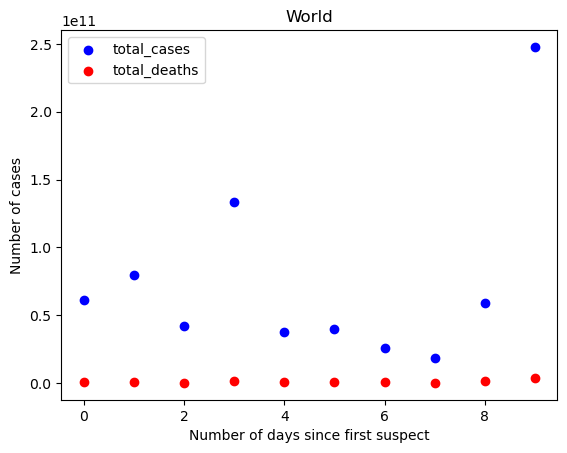

In [29]:
C = df5
plt.scatter(np.arange(0,len(C)), C['total_cases'], color="blue", label="total_cases")
plt.scatter(np.arange(0,len(C)), C['total_deaths'], color="red", label="total_deaths")
plt.title("World")
plt.xlabel("Number of days since first suspect")
plt.ylabel("Number of cases")
plt.legend()
plt.show()

In [30]:
date = df4['Date'].unique()
len(date)

804

In [31]:
df6 = df4.groupby(['Date'])[['Date','total_cases','total_deaths']].sum().reset_index()

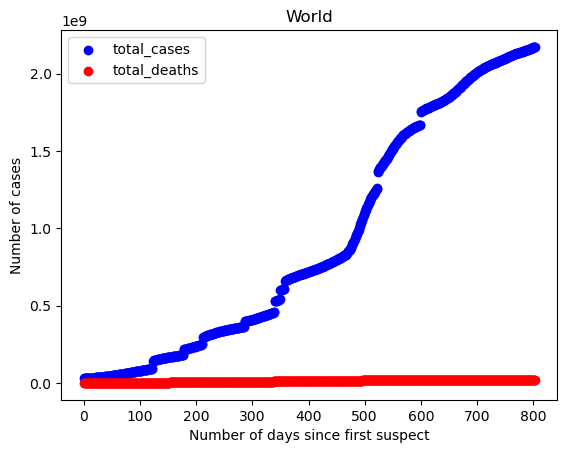

In [32]:
C = df6
plt.scatter(np.arange(0,len(C)), C['total_cases'], color="blue", label="total_cases")
plt.scatter(np.arange(0,len(C)), C['total_deaths'], color="red", label="total_deaths")
plt.title("World")
plt.xlabel("Number of days since first suspect")
plt.ylabel("Number of cases")
plt.legend()
plt.show()